# Statistical Distances for MCMC Results

## Package imports

Change the path append for wherever your pypesto package is installed.

In [1]:
# import sys
# sys.path.append(r'~/.local/lib/python3.8/site-packages/')

from typing import Dict
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance, energy_distance
import load_conf as lc


## Import data

In [2]:
#base_folder = Path(r'/data/spines/pypesto')

import h5py
# base_folder = Path(r'C:\Users\clayj\Documents\rat_hindlimb')
base_folder = Path("")

mcmc_data = {

    #'0.0': pickle.load(open(base_folder / '2021-May-01_19-50.pypesto_results.0_0-only.true_uniform_prior.40.pkl', 'rb')),
    #'0.1': pickle.load(open(base_folder / '2021-May-04_23-59.pypesto_results.0_1-only.true_uniform_prior.40.pkl', 'rb')),
    #'0.2': pickle.load(open(base_folder / '2021-Apr-30_01-27.pypesto_results.0_2-only.true_uniform_prior.40.pkl', 'rb')),
    #'0.3': pickle.load(open(base_folder / '2021-May-12_04-56.pypesto_results.0_3-only.true_uniform_prior.40.pkl', 'rb')),
    #'0.4': pickle.load(open(base_folder / '2021-May-07_07-34.pypesto_results.0_4-only.true_uniform_prior.40.pkl', 'rb')),
    #'agg': pickle.load(open(base_folder / '2021-May-10_07-18.pypesto_results.all.true_uniform_prior.64.pkl', 'rb')),
}

h5_path = base_folder / "t4_a.h5" #"h5_files/g_syns2.h5"
toml_path = Path("conf_t4.toml")
all_list_params = lc.load_param_names(toml_path)
params_used = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
list_params = []

for i in params_used: 
    list_params.append(all_list_params[i])

with h5py.File(h5_path) as h5_file:
    trace_x = h5_file['trace_x'][()]  # ex. (24, 12001 20)
    print(trace_x.shape)
    trace_neglogpost = h5_file['trace_neglogpost'][()]  # ex. (24, 12001)
    print(trace_neglogpost.shape)
    trace_neglogpost_flat = trace_neglogpost.flatten()
    print(trace_neglogpost_flat.shape)
    trace_x_flat = trace_x.reshape((trace_x.shape[0] * trace_x.shape[1], trace_x.shape[2]))
    sr_trace_neglogpost = pd.Series(data=trace_neglogpost_flat, name='neglogpost')
    df_results = pd.DataFrame(data=trace_x_flat, columns=list_params)
    df_results.insert(0, "neglogpost", sr_trace_neglogpost)

#cleaned_tables = {key: generate_summary_dataframe(value) for key, value in mcmc_data.items()}
#params = list(cleaned_tables['0.0'].columns)[1:]
df_results['neglogpost'] = (df_results['neglogpost'] - 14*np.log(20))/1
df_results['neglogpost'] = df_results['neglogpost'] - np.min(df_results['neglogpost']) + 1


(10, 2001, 12)
(10, 2001)
(20010,)


In [3]:
import os
#print({key: table['neglogpost'].min()-9*np.log(10000.0) for key, table in cleaned_tables.items()})
#print({key: table['neglogpost'].min()-9*np.log(10000.0) for key, table in df_results.items()})
#df_results['neglogpost'] = (df_results['neglogpost'] - 14*np.log(20)) / 1e3
print(np.max(df_results['neglogpost']))
print(np.min(df_results['neglogpost']))
print(np.mean(df_results['neglogpost']))
print(2e3)
print(1e0)

df_results = df_results.sort_values(by='neglogpost', ascending=False)
#df_results['neglogpost'] = (df_results['neglogpost'] - np.min(df_results['neglogpost']))/(np.max(df_results['neglogpost']) - np.min(df_results['neglogpost']))

print(df_results)
#print(np.where(df_results['neglogpost'] == np.min(df_results['neglogpost'])))

27948.886782697544
1.0
208.17163732348138
2000.0
1.0
         neglogpost  Retina Cutoff Freq  L1 Low Cutoff Freq  \
16004  27948.886783          199.494110          203.964915   
20005  27948.886783          199.494110          203.964915   
18006  27948.886783          199.494110          203.964915   
18003  27948.886783          199.494110          203.964915   
20008  27948.886783          199.494110          203.964915   
...             ...                 ...                 ...   
1738       1.000000           81.973478          294.053921   
1737       1.000000          208.451409          274.179523   
1736       1.000000          299.662227          286.202280   
1735       1.000000          200.057889          266.382710   
5708       1.000000          115.730648          265.861369   

       L1 High Cutoff Freq  L3 Cutoff Freq  Mi1 Cutoff Freq  Mi9 Cutoff Freq  \
16004           189.878268      163.138123       102.629310       166.768238   
20005           189.878268    

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
import seaborn as sns

def create_posterior(le_orig_data, filename, sample_ratio:float = 1.0, alpha=0.2, x_axis:str = 'g_Na', y_axis:str = 'g_Kd'):
    sns.reset_defaults()
    # le_data = le_orig_data.sort_values(by=['neglogpost'], ignore_index=True, ascending=False)
    # sample_size = int(sample_ratio * len(le_data['neglogpost']))
    nlp = (le_orig_data['neglogpost'])  # .sample(n=sample_size)
    sns.set_style(style='white')
    g = sns.JointGrid(data=le_orig_data, x=x_axis, y=y_axis, height=10)
    the_cmap = cm.get_cmap(name='plasma')
    # display_min = max(1e-6, nlp.min()) if nlp.min() < 5.0 else 1e1
    # print(display_min)
    norm = LogNorm(1e1, 2e3)
    #norm = None
    # inv_norm = LogNorm(1.0/1e3, 1.0/display_min)
    sm = plt.cm.ScalarMappable(cmap=the_cmap, norm=norm)
    # g.plot_joint(sns.scatterplot, alpha=alpha, size=1.0/nlp, sizes=(10, 40), size_norm=inv_norm, hue=nlp, hue_norm=norm, palette=the_cmap, legend=False)  # alpha=0.002, hue_norm=LogNorm(vmin=nlp.min(), vmax=nlp.max()), 
    g.plot_joint(sns.scatterplot, alpha=alpha, hue=nlp, hue_norm=norm, palette=the_cmap, legend=False, rasterized=True)  # alpha=0.002, hue_norm=LogNorm(vmin=nlp.min(), vmax=nlp.max()), 
    g.ax_joint.figure.colorbar(sm, shrink=10.0)
    g.plot_marginals(sns.histplot, kde=True)
    plt.savefig(f'posterior_{x_axis}_{y_axis}_{filename}.png', dpi=600)
    plt.show()

/tmp/ipykernel_4752/3927187200.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  g.ax_joint.figure.colorbar(sm, shrink=10.0)


StopIteration: 

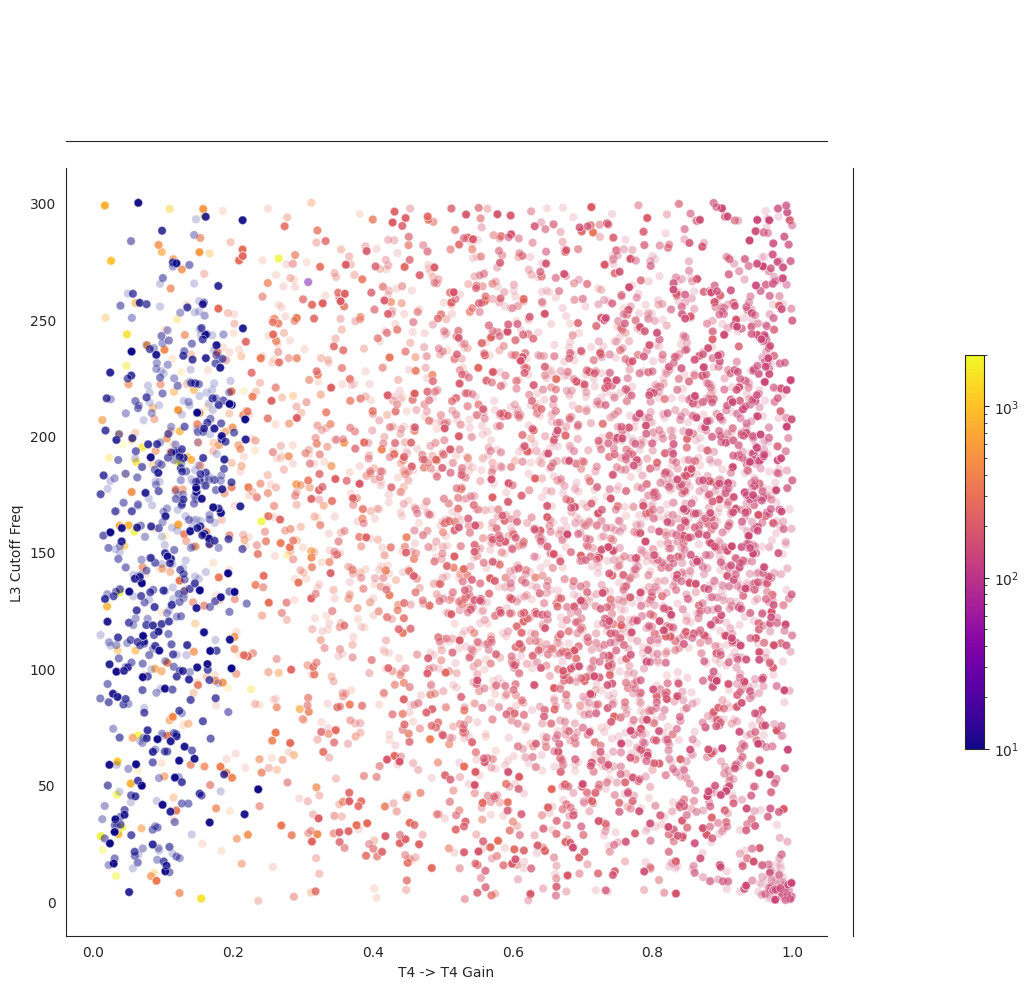

In [5]:
#[create_posterior(table, current) for current, table in cleaned_tables.items()]
create_posterior(df_results, "old_cost", sample_ratio=1.0, x_axis=list_params[11], y_axis=list_params[3])

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
import seaborn as sns

def create_posterior_big_plot_color(le_orig_data, filename, sample_ratio:float = 1.0, alpha=0.05):
    sns.set_context("paper", rc={"font.size":48, "axes.titlesize":48, "axes.labelsize":48, "xtick.labelsize":48, "ytick.labelsize":48})
    sns.set_style("white")
    plt.ioff()
    le_data = le_orig_data.sort_values(by=['neglogpost'], ignore_index=True, ascending=False)
    sample_size = int(sample_ratio * len(le_data['neglogpost']))
    nlp = (le_data['neglogpost']) # .sample(n=sample_size)
    print(nlp.min())
    the_cmap = cm.get_cmap(name='plasma')
   # display_min = max(1e0, nlp.min())
    #print(display_min)
    norm = LogNorm(1e1, 2e3)
    sm = plt.cm.ScalarMappable(cmap=the_cmap, norm=norm)
    
    cols_to_use = [col for col in le_data.columns if col != 'neglogpost']
    g = sns.PairGrid(data=le_data, height=10, vars=cols_to_use)
    g.map_lower(sns.scatterplot, alpha=alpha, hue=nlp, hue_norm=norm, palette=the_cmap, legend=False)  # alpha=0.002, hue_norm=LogNorm(vmin=nlp.min(), vmax=nlp.max()), 
    # g.ax_joint.figure.colorbar(sm, shrink=10.0)
    g.map_diag(sns.histplot, kde=True)
    plt.savefig(f'big_plot_{filename}.png')

In [7]:
#[create_posterior_big_plot_color(table, current) for current, table in cleaned_tables.items()]
create_posterior_big_plot_color(df_results, "filename here")

1.0


StopIteration: 

In [ ]:
import AlonsoMarderModel_pypesto_estimate as ammpe

true_params = np.array((1076.392,  # uS, transient sodium conductance
                        6.4056,  # uS, low-threshold calcium conductance
                        10.048,  # uS, slow calcium conductance
                        8.0384,  # uS, transient potassium conductance
                        17.584,  # uS, calcium-dependent potassium conductance
                        124.0928,  # uS, potassium conductance
                        0.11304,  # uS, hyperpolarization-activated cation conductance
                        0.17584,  # uS, leak conductance
                        653.5))

print('True 0.4')
print(ammpe.generated_fn(sample_params=true_params, step=0.01, stop=6000.0, current_injected=0.4))
print('Best 0.4')
print(ammpe.generated_fn(sample_params=cleaned_tables['0.4'].iloc[0].to_numpy()[1:], step=0.01, stop=6000.0, current_injected=0.4))
# ammpe.generated_fn(df_true_uniform_0_4.iloc[0])

print('True 0.')
print(ammpe.generated_fn(sample_params=true_params, step=0.01, stop=6000.0, current_injected=0.0))
print('Best 0.0')
print(ammpe.generated_fn(sample_params=cleaned_tables['0.0'].iloc[0].to_numpy()[1:], step=0.01, stop=6000.0, current_injected=0.0))

## Create base table

This is the format for the table, which each column is against the aggregate:

| &nbsp; | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 |
|:---|:---|:---|:---|:---|:---|
| param 1 |-----|-----|-----|-----|-----|
| ... |-----|-----|-----|-----|-----|
| param 9 |-----|-----|-----|-----|-----|
| all params |-----|-----|-----|-----|-----|

## Wasserstein distance

In [ ]:
# TODO: against uniform prior rectangle distribution
# TODO: g_Na vs. g_Kd on 2D Wasserstein

dict_wd: Dict[str, Dict[str, float]] = {}
for current, current_table in cleaned_tables.items():
    dict_wd[current] = {}
    for param in params:
        dict_wd[current][param] = wasserstein_distance(cleaned_tables[current][param],
                                                       cleaned_tables['agg'][param])

In [ ]:
df_wd = pd.DataFrame(data=dict_wd)
df_wd.head(n=11)

In [ ]:
df_wd_norm = df_wd.apply(lambda row: row / df_wd.max().max(), axis=1)
sns.heatmap(data=df_wd_norm, annot=True, fmt=".3f")
plt.title('Wasserstein Distance (Normalized)')
plt.show()


## Energy distance

In [ ]:
dict_ed: Dict[str, Dict[str, float]] = {}
for current, current_table in cleaned_tables.items():
    dict_ed[current] = {}
    for param in params:
        dict_ed[current][param] = energy_distance(cleaned_tables[current][param],
                                                  cleaned_tables['agg'][param])

In [ ]:
df_ed = pd.DataFrame(data=dict_ed)
df_ed.head(n=11)

In [ ]:
df_ed_norm = df_ed.apply(lambda row: row / df_ed.max().max(), axis=1)
sns.heatmap(data=df_ed_norm, annot=True, fmt=".3f")
plt.title('Energy Distance (Normalized)')
plt.show()

## rpy2 Setup

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import StrVector, IntVector
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

base = importr('base')
transport = importr('transport')

In [ ]:
min_len = min([len(val) for _, val in cleaned_tables.items()])

In [ ]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_cleaned_tables = {key: ro.conversion.py2rpy(table.sample(min_len))  # TODO: change sample size
                        for key, table in cleaned_tables.items()}

### Wasserstein using rpy2

In [ ]:
# ONLY RUN THIS CELL IF DOING TRANSPORT
for key in list(r_cleaned_tables.keys()): 
    r_cleaned_tables[key] = transport.pp(base.as_matrix(r_cleaned_tables[key].rx(True, IntVector((2, 3, 4, 5, 6, 7, 8, 9, 10)))))  # 2 = Na, 7 = Kd, 5 = A

In [ ]:
final = {}
for key in list(r_cleaned_tables.keys()):
    print(key)
    final[key] = transport.subwasserstein(r_cleaned_tables[key], r_cleaned_tables['agg'], S=1000, p=1, K=(min_len // 1000)) if key != 'agg' else [0.0]
    print(f"{key}: {final[key]}")
final = {key: val[0] for key, val in final.items()}

In [ ]:
print(final)
pd.concat((df_wd, pd.DataFrame.from_dict({'all params': final}, orient='index')))

KL Divergence using rpy2

In [ ]:
fnn = importr('FNN')


In [ ]:
for key in list(r_cleaned_tables.keys()):
    r_cleaned_tables[key] = base.as_matrix(r_cleaned_tables[key].rx(True, IntVector((2, 7))))

In [ ]:
fnn.KLx_divergence(r_cleaned_tables['0.0'], r_cleaned_tables['agg'])

In [ ]:
ro.r('''
    set.seed(1000)
    X<- rexp(10000, rate=0.2)
    Y<- rexp(10000, rate=0.4)

    KL.divergence(X, Y, k=5)
    ''')